In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Descomprimimos la base de datos (unzip)**

In [2]:
import zipfile
import random, os, shutil
import copy
import imageio
import PIL
import numpy as np

#Extracción de la base de datos
local_zip = '/content/drive/My Drive/G3_AI_Lab_School/Examen_Extraordinario/architecturalheritageelementsdataset128creativecommons.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

# Renombramos la BD para que sea más facil administrarla
os.rename('Architectural_Heritage_Elements_Dataset_128(creative_commons)', 'arquitectura')

In [ ]:
import shutil
shutil.rmtree('arquitectura')
#shutil.rmtree('test_original')

In [3]:
#Revisar longitud de las clases con su nombre original
lst = sorted(os.listdir('arquitectura'))

for name in lst:
    print('longitug de ', name)
    print(len(os.listdir('arquitectura/'+name)))

longitug de  altar
829
longitug de  apse
514
longitug de  bell_tower
1059
longitug de  column
1919
longitug de  dome(inner)
616
longitug de  dome(outer)
1177
longitug de  flying_buttress
407
longitug de  gargoyle
1571
longitug de  stained_glass
1033
longitug de  vault
1110


# **Renombramos las clases de la base de datos**

In [4]:
# Se renombran las clases originales para mayor y mejor gestión de los datos/imagenes
# para el conjunto de entrenamiento, valoración y pruebas

lst = sorted(os.listdir('arquitectura'))
i = 1
for name in lst:
  if (i < 10):
    os.rename('arquitectura/'+name, 'arquitectura/clase0{}'.format(i))
  else:
    os.rename('arquitectura/'+name, 'arquitectura/clase{}'.format(i))
  i += 1

In [5]:
# Comprobar cambio en carpetas de la BD

lst = os.listdir('arquitectura')
i = 1
for name in lst:
  if (i < 10):
    print('nombre de carpeta : ','arquitectura/clase0{}'.format(i))
  else:
     print('nombre de carpeta : ','arquitectura/clase{}'.format(i))
  i += 1

nombre de carpeta :  arquitectura/clase01
nombre de carpeta :  arquitectura/clase02
nombre de carpeta :  arquitectura/clase03
nombre de carpeta :  arquitectura/clase04
nombre de carpeta :  arquitectura/clase05
nombre de carpeta :  arquitectura/clase06
nombre de carpeta :  arquitectura/clase07
nombre de carpeta :  arquitectura/clase08
nombre de carpeta :  arquitectura/clase09
nombre de carpeta :  arquitectura/clase10


# **Construcción de los conjuntos de entrenamiento, validación y prueba**

**Creación de las carpetas de entrenamiento y prueba iniciales, con sus respectivas carpetas para cada clase**

In [ ]:
import shutil
shutil.rmtree('train_original')
shutil.rmtree('test_original')

In [6]:
datasets = ['train_original', 'test_original']

for dataset_name in datasets:
  os.mkdir(dataset_name)
  for i in range(1,11):
    if i < 10:
      dest_set = dataset_name+'/clase0{}/'.format(i)
    elif i >= 10:
      dest_set = dataset_name+'/clase{}/'.format(i)
    os.mkdir(dest_set)

**Asignación de imágenes a cada conjunto**

In [7]:
# Esta función pasa imagenes de una carpeta a otra
def fill_dataset(src_dataset, dest_dataset, arq_index, limit_low, limit_upper): 

  if arq_index < 10:
    src_path = src_dataset+'/clase0{}/'.format(arq_index)
    dest_path = dest_dataset+'/clase0{}/'.format(arq_index)
  else:
    src_path = src_dataset+'/clase{}/'.format(arq_index)
    dest_path = dest_dataset+'/clase{}/'.format(arq_index)

  lst = sorted(os.listdir(src_path))
        
  for file_name in lst[limit_low:limit_upper]: 
    if limit_low < limit_upper:
      img_original = imageio.imread(src_path + file_name)
      if limit_low < 10:
          imageio.imwrite(dest_path + '000{}.jpg'.format(limit_low), img_original)
      elif (limit_low >= 10 and limit_low < 100):
          imageio.imwrite(dest_path + '00{}.jpg'.format(limit_low), img_original)
      else: 
          imageio.imwrite(dest_path + '0{}.jpg'.format(limit_low), img_original)
              
      limit_low = limit_low + 1

In [8]:
#Revisar longitud de las clases

for i in range(1,11):
  if i < 10:
    print('total images in arquitectura/clase0{}:'.format(i), len(os.listdir('arquitectura/clase0{}/'.format(i))))
  else:
    print('total images in arquitectura/clase{}:'.format(i), len(os.listdir('arquitectura/clase{}/'.format(i))))

total images in arquitectura/clase01: 829
total images in arquitectura/clase02: 514
total images in arquitectura/clase03: 1059
total images in arquitectura/clase04: 1919
total images in arquitectura/clase05: 616
total images in arquitectura/clase06: 1177
total images in arquitectura/clase07: 407
total images in arquitectura/clase08: 1571
total images in arquitectura/clase09: 1033
total images in arquitectura/clase10: 1110


In [9]:
#clase01
fill_dataset('arquitectura','train_original', 1, 0, 400)
fill_dataset('arquitectura','test_original', 1, 401, 829)

#clase02
fill_dataset('arquitectura','train_original', 2, 0, 400)
fill_dataset('arquitectura','test_original', 2, 401, 514)

#clase03
fill_dataset('arquitectura','train_original', 3, 0, 400)
fill_dataset('arquitectura','test_original', 3, 401, 1059)

#clase04
fill_dataset('arquitectura','train_original', 4, 0, 400)
fill_dataset('arquitectura','test_original', 4, 401, 1919)

#clase05
fill_dataset('arquitectura','train_original', 5, 0, 400)
fill_dataset('arquitectura','test_original', 5, 401, 616)

#clase06
fill_dataset('arquitectura','train_original', 6, 0, 400)
fill_dataset('arquitectura','test_original', 6, 401, 1177)

#clase07
fill_dataset('arquitectura','train_original', 7, 0, 400)
fill_dataset('arquitectura','test_original', 7, 401, 407)

#clase08
fill_dataset('arquitectura','train_original', 8, 0, 400)
fill_dataset('arquitectura','test_original', 8, 401, 1571)

#clase09
fill_dataset('arquitectura','train_original', 9, 0, 400)
fill_dataset('arquitectura','test_original', 9, 401, 1033)

#clase10
fill_dataset('arquitectura','train_original', 10, 0, 400)
fill_dataset('arquitectura','test_original', 10, 401, 1110)

In [10]:
#Comprobación
import os
for i in range(1,11):
  if i < 10:
    print('total  images in train_original/clase0{}:'.format(i), len(os.listdir('train_original/clase0{}/'.format(i))))
  else:
    print('total  images in train_original/clase{}:'.format(i), len(os.listdir('train_original/clase{}/'.format(i))))

#El conjunto de entrenamiento hay que volverlo balanceado en este caso hay que poner todo en XXXX que es el tamaño menor que se encuentra

total  images in train_original/clase01: 400
total  images in train_original/clase02: 400
total  images in train_original/clase03: 400
total  images in train_original/clase04: 400
total  images in train_original/clase05: 400
total  images in train_original/clase06: 400
total  images in train_original/clase07: 400
total  images in train_original/clase08: 400
total  images in train_original/clase09: 400
total  images in train_original/clase10: 400


In [11]:
#Comprobación
import os
for i in range(1,11):
  if i < 10:
    print('total  images in test_original/clase0{}:'.format(i), len(os.listdir('test_original/clase0{}/'.format(i))))
  else:
    print('total  images in test_original/clase{}:'.format(i), len(os.listdir('test_original/clase{}/'.format(i))))

# En el conjunto de prueba se pone la mitad en el conjunto de prueba y la otra en el de validación, no se esta balanceando no importa en este momento
# solo asegurarse que este la mitad y la mitad

total  images in test_original/clase01: 428
total  images in test_original/clase02: 113
total  images in test_original/clase03: 658
total  images in test_original/clase04: 1518
total  images in test_original/clase05: 215
total  images in test_original/clase06: 776
total  images in test_original/clase07: 6
total  images in test_original/clase08: 1170
total  images in test_original/clase09: 632
total  images in test_original/clase10: 709


**Ordenamos el conjunto de entrenamiento aleatoriamente**

In [12]:
# teniendo los conjuntos definidos hay que poner las imagenes de forma aleatoria
# se tomaran las 400 porque ahora estarán presentadas en un orden aleatorio que 
# es el objetivo | Por cada clase del conjunto de entrenamiento se están ordenando aleatoriamente

def shuffling_dataset(src_dataset, dest_dataset):

  os.mkdir(dest_dataset)

  for i in range(1,11):
    if i < 10:
      dest_path = dest_dataset+'/clase0{}/'.format(i)
    elif i >= 10:
      dest_path = dest_dataset+'/clase{}/'.format(i)
    os.mkdir(dest_path)

  for index_class in range(1,11):
    sample = 0
    if index_class < 10:
      class_path = src_dataset+'/clase0{}/'.format(index_class)
    elif index_class >= 10:
      class_path = src_dataset+'/clase{}/'.format(index_class)

    lst = sorted(os.listdir(class_path))
    #Shuffling the dataset
    random.shuffle(lst)

    for file_name in lst:
      img_arq = imageio.imread(class_path + file_name)
      if index_class < 10:
        if sample < 10:
          imageio.imwrite(dest_dataset + '/clase0{}/'.format(index_class) + '000{}.jpg'.format(sample), img_arq)
        elif sample >= 10 and sample < 100:
          imageio.imwrite(dest_dataset + '/clase0{}/'.format(index_class) + '00{}.jpg'.format(sample), img_arq)
        elif sample >= 100 and sample < 1000:
          imageio.imwrite(dest_dataset + '/clase0{}/'.format(index_class) + '0{}.jpg'.format(sample), img_arq)
        else:
          imageio.imwrite(dest_dataset + '/clase0{}/'.format(index_class) + '{}.jpg'.format(sample), img_arq)
        
        sample = sample + 1

      else:
        if sample < 10:
          imageio.imwrite(dest_dataset + '/clase{}/'.format(index_class) + '000{}.jpg'.format(sample), img_arq)
        elif sample >= 10 and sample < 100:
          imageio.imwrite(dest_dataset + '/clase{}/'.format(index_class) + '00{}.jpg'.format(sample), img_arq)
        elif sample >= 100 and sample < 1000:
          imageio.imwrite(dest_dataset + '/clase{}/'.format(index_class) + '0{}.jpg'.format(sample), img_arq)
        else:
          imageio.imwrite(dest_dataset + '/clase{}/'.format(index_class) + '{}.jpg'.format(sample), img_arq)
        
        sample = sample + 1

In [13]:
shuffling_dataset('train_original', 'train_shuffled')

In [14]:
#Comprobación
import os
for i in range(1,11):
  if i < 10:
    print('total  images in train_shuffled/clase0{}:'.format(i), len(os.listdir('train_shuffled/clase0{}/'.format(i))))
  else:
    print('total  images in train_shuffled/clase{}:'.format(i), len(os.listdir('train_shuffled/clase{}/'.format(i))))

total  images in train_shuffled/clase01: 400
total  images in train_shuffled/clase02: 400
total  images in train_shuffled/clase03: 400
total  images in train_shuffled/clase04: 400
total  images in train_shuffled/clase05: 400
total  images in train_shuffled/clase06: 400
total  images in train_shuffled/clase07: 400
total  images in train_shuffled/clase08: 400
total  images in train_shuffled/clase09: 400
total  images in train_shuffled/clase10: 400


**Creación de la carpeta de entrenamiento final con sus respectivas carpetas para cada clase**

In [15]:
# se crea la estructura de carpetas que de inicio estarán vacias

datasets = ['train']

for dataset_name in datasets:
  os.mkdir(dataset_name)
  for i in range(1,11):
    if i < 10:
      dest_train = dataset_name+'/clase0{}/'.format(i)
    elif i >= 10:
      dest_train = dataset_name+'/clase{}/'.format(i)
    os.mkdir(dest_train)

**Asignación de imágenes a cada conjunto**

In [16]:
# Este for nos sirve para tomar del conjunto train_shuffled las 400 imagenes ya aleatorias y
# se pasaran al conjunto train con los limites definidos de 0 a 400
for i in range(1,11):
  fill_dataset('train_shuffled','train', i, 0, 400) 

In [17]:
#Comprobación
import os
for i in range(1,11):
  if i < 10:
    print('total  images in train/clase0{}:'.format(i), len(os.listdir('train/clase0{}/'.format(i))))
  else:
    print('total  images in train/clase{}:'.format(i), len(os.listdir('train/clase{}/'.format(i))))

total  images in train/clase01: 400
total  images in train/clase02: 400
total  images in train/clase03: 400
total  images in train/clase04: 400
total  images in train/clase05: 400
total  images in train/clase06: 400
total  images in train/clase07: 400
total  images in train/clase08: 400
total  images in train/clase09: 400
total  images in train/clase10: 400


**Generación de los conjuntos finales de validación y prueba**

**Ordenamos el conjunto de prueba aleatoriamente**

In [18]:
shuffling_dataset('test_original', 'test_shuffled')

# estos conjuntos son exactamente lo mismo la diferencia es que el test_shuffled estan de forma aleatoria

**Creación de las carpetas finales de validación y prueba con sus respectivas carpetas para cada clase**

In [19]:
# Se crean los conjuntos de validación y prueba para subir 100 imagenes en el
# conjunto de validación y las que sobren en el conjunto de pruebas
# se crean las carpetas validation y test

datasets = ['validation','test']

for dataset_name in datasets:
  os.mkdir(dataset_name)
  for i in range(1,11):
    if i < 10:
      dest_train = dataset_name+'/clase0{}/'.format(i)
    else:
      dest_train = dataset_name+'/clase{}/'.format(i)
    os.mkdir(dest_train)

In [20]:
#Comprobación
import os
for i in range(1,11):
  if i < 10:
    print('total  images in test_shuffled/clase0{}:'.format(i), len(os.listdir('test_shuffled/clase0{}/'.format(i))))
  else:
    print('total  images in test_shuffled/clase{}:'.format(i), len(os.listdir('test_shuffled/clase{}/'.format(i))))

total  images in test_shuffled/clase01: 428
total  images in test_shuffled/clase02: 113
total  images in test_shuffled/clase03: 658
total  images in test_shuffled/clase04: 1518
total  images in test_shuffled/clase05: 215
total  images in test_shuffled/clase06: 776
total  images in test_shuffled/clase07: 6
total  images in test_shuffled/clase08: 1170
total  images in test_shuffled/clase09: 632
total  images in test_shuffled/clase10: 709


**Asignación de imágenes a cada conjunto**

In [21]:
# se reparten las imagenes la mitad al conjunto de validation y la mitad al conjunto de test
# los limtes se obtienen de forma manual revisando cada clase de la face01 a la face17
# para después utilizar la función fill_dataset y separar la cantidad requerida en este caso mitad
# y mitad para cada conjunto.

#clase01
fill_dataset('test_shuffled','validation', 1, 0, 100)
fill_dataset('test_shuffled','test', 1, 101, 428)

#clase02
fill_dataset('test_shuffled','validation', 2, 0, 100)
fill_dataset('test_shuffled','test', 2, 101, 113)

#clase03
fill_dataset('test_shuffled','validation', 3, 0, 100)
fill_dataset('test_shuffled','test', 3, 101, 658)

#clase04
fill_dataset('test_shuffled','validation', 4, 0, 100)
fill_dataset('test_shuffled','test', 4, 101, 1518)

#clase05
fill_dataset('test_shuffled','validation', 5, 0, 100)
fill_dataset('test_shuffled','test', 5, 101, 215)

#clase06
fill_dataset('test_shuffled','validation', 6, 0, 100)
fill_dataset('test_shuffled','test', 6, 101, 776)

#clase07
fill_dataset('test_shuffled','validation', 7, 0, 2)
fill_dataset('test_shuffled','test', 7, 3, 6)

#clase08
fill_dataset('test_shuffled','validation', 8, 0, 100)
fill_dataset('test_shuffled','test', 8, 101, 1170)

#clase09
fill_dataset('test_shuffled','validation', 9, 0, 100)
fill_dataset('test_shuffled','test', 9, 101, 632)

#clase10
fill_dataset('test_shuffled','validation', 10, 0,100)
fill_dataset('test_shuffled','test', 10, 101, 709)

In [22]:
#Comprobación
import os
for i in range(1,11):
  if i < 10:
    print('total  images in validation/clase0{}:'.format(i), len(os.listdir('validation/clase0{}/'.format(i))))
    print('total  images in test/clase0{}:'.format(i), len(os.listdir('test/clase0{}/'.format(i))))
  else:
    print('total  images in validation/clase{}:'.format(i), len(os.listdir('validation/clase{}/'.format(i))))
    print('total  images in test/clase{}:'.format(i), len(os.listdir('test/clase{}/'.format(i))))

total  images in validation/clase01: 100
total  images in test/clase01: 327
total  images in validation/clase02: 100
total  images in test/clase02: 12
total  images in validation/clase03: 100
total  images in test/clase03: 557
total  images in validation/clase04: 100
total  images in test/clase04: 1417
total  images in validation/clase05: 100
total  images in test/clase05: 114
total  images in validation/clase06: 100
total  images in test/clase06: 675
total  images in validation/clase07: 2
total  images in test/clase07: 3
total  images in validation/clase08: 100
total  images in test/clase08: 1069
total  images in validation/clase09: 100
total  images in test/clase09: 531
total  images in validation/clase10: 100
total  images in test/clase10: 608


**Referenciamos los conjuntos de entrenamiento, validación y prueba**

In [23]:
# Se referencia los conjuntos de entrenamiento, validación y pruebas con sus rutas
train_dir = os.path.join('train')
validation_dir = os.path.join('validation')
test_dir = os.path.join('test')

**Carga de la arquitectura VGG16**

In [24]:
# Se define la arquitectura que se va a utilizar
# en esta caso se utilizará Transfer Learninig VGG16
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(72, 96, 3))

conv_base.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 72, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 72, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 72, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 36, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 36, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 36, 48, 128)       147584    
______________________________________________________________

**Congelamos y descongelamos ciertas capas (Fine-tuning)**

In [25]:
# Para este caso se congelan las primeras 4 capas o lo promeros 4 bloques
# y nos quedamos con las úlitmas capas del úlitmo bloque activo

for layer in conv_base.layers:
    if layer.name[:6] == 'block5': 
      layer.trainable = True
    else:
      layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 72, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 72, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 72, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 36, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 36, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 36, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 24, 128)       0     

# **Definición de la arquitectura (incluyendo el módulo de transfer learning)**

In [31]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(conv_base) # Se agrega la parte convolucional
model.add(layers.MaxPooling2D((2, 2))) # Se añade un capa MaxPooling
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization()) # y se agrega una capa para normalizar
model.add(layers.Flatten()) # Se aplana todo
model.add(layers.Dense(10, activation='softmax')) # y para finalizar se agrega una capa de salida con 10 neuronas

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 3, 512)         14714688  
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 512)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 512)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 1, 512)         2048      
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 14,721,866
Trainable params: 7,085,578
Non-trainable params: 7,636,288
___________________________________

# **Compilación**

In [33]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# **Definición de los generadores**

In [34]:
#Using ImageDataGenerator to read images from directories
# se definen los generadores donde se aplica la normalización 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # Target directory
        target_size=(72, 96), # All images are resized from 240x320 to 72x96
        batch_size= 4, 
        color_mode='rgb',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(72, 96),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

Found 4000 images belonging to 10 classes.
Found 902 images belonging to 10 classes.


# **Entrenamiento**

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('/content/drive/My Drive/G3_AI_Lab_School/Examen_Extraordinario/F_re_arq_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
# Definir bajo que metrica correra el modelo
# Se corre el modelo tomando el accuracy del conjunto de validación y se guardara cuando 
# se tenga un mejor modelo con respecto al conjunto de validación
# entre más elevada sea se guarda el modelo

#Training and validation stages
history = model.fit(
      train_generator,
      steps_per_epoch=400, 
      epochs= 40,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks = [mc])

Epoch 1/40
400/400 [==============================] - 120s 296ms/step - loss: 1.8106 - acc: 0.3862 - val_loss: 0.7843 - val_acc: 0.8000

Epoch 00001: val_acc improved from -inf to 0.80000, saving model to /content/drive/My Drive/G3_AI_Lab_School/Examen_Extraordinario/F_re_arq_model.h5
Epoch 2/40
400/400 [==============================] - 117s 292ms/step - loss: 1.3987 - acc: 0.5506 - val_loss: 1.1806 - val_acc: 0.6600

Epoch 00002: val_acc did not improve from 0.80000
Epoch 3/40
400/400 [==============================] - 117s 292ms/step - loss: 1.2002 - acc: 0.6369 - val_loss: 0.6222 - val_acc: 0.8400

Epoch 00003: val_acc improved from 0.80000 to 0.84000, saving model to /content/drive/My Drive/G3_AI_Lab_School/Examen_Extraordinario/F_re_arq_model.h5
Epoch 4/40
400/400 [==============================] - 117s 293ms/step - loss: 1.0396 - acc: 0.6938 - val_loss: 0.5674 - val_acc: 0.7800

Epoch 00004: val_acc did not improve from 0.84000
Epoch 5/40
400/400 [==============================]

# **Curvas de precisión y pérdida**

Best accuracy epoch :  24, Value :  1.0
Best loss epoch :  24, Value :  0.0774418339


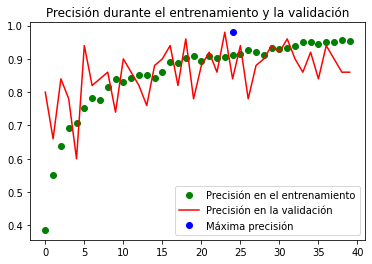

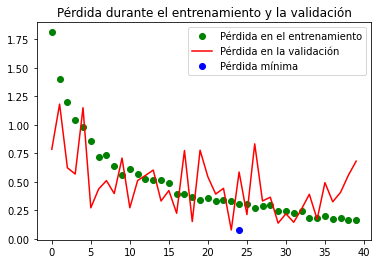

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Máxima precisión')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()
print("Best accuracy epoch : % d, Value : % .1f" %(max_val_acc_epoch, max_val_acc)) 
plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Pérdida mínima')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print("Best loss epoch : % d, Value : % .10f" %(min_val_loss_epoch, min_val_loss))

plt.show()

In [37]:
#Cargamos el modelo incial
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/G3_AI_Lab_School/Examen_Extraordinario/F_re_arq_model.h5', compile = True)

# **Evaluación del modelo final**

In [38]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(72, 96),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

Found 5313 images belonging to 10 classes.


In [39]:
# Se evalua el modelo con model_evaluate_gnerador
test_loss, test_acc = model.evaluate(test_generator, steps=4000, workers=0, max_queue_size=0)
print('Accuracy : ', test_acc)

4000/4000 [==============================] - 237s 59ms/step - loss: 0.3552 - acc: 0.9038
Accuracy :  0.9037500023841858


# **Predicciones**

In [40]:
#Cargamos el modelo
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/G3_AI_Lab_School/Examen_Extraordinario/F_re_arq_model.h5', compile = False)
# Es importante que para realizar predicciones el parametro compile = false

In [41]:
# Se tiene que modificar la imagen al formato adecuado en este caso a un tensor
# para hacer las predicciones

from PIL import Image

width = 96
height = 72
image_arq = Image.open('test/clase05/0107.jpg') #REVISAR
image_arq = image_arq.resize((width, height), Image.ANTIALIAS)
image_arq = np.array(image_arq)
image_arq = image_arq / 255.0
image_arq = np.expand_dims(image_arq, axis = 0)
image_arq = np.expand_dims(image_arq, axis = -1)
image_arq = np.stack((image_arq[:,:,:,0], image_arq[:,:,:,0], image_arq[:,:,:,0]), axis=3)
print(image_arq.shape)
prediction = model.predict(image_arq)
print('La imagen pertenece a la clase', np.argmax(prediction)+1)

(1, 72, 96, 3, 1)
La imagen pertenece a la clase 5


In [42]:
# Se tienne dos listas vacias
predictions = [] # Las predicciones que arroja el modelo
labels = [] # y las etiquetas son los valores reales o el objetivo

for individual in range(1,11):
  if (individual) < 10:
    arq = 'clase0{}/'.format(individual)
  elif (individual) >= 10:
    arq = 'clase{}/'.format(individual)
  
  for index in range(len(os.listdir('validation/'+arq))+1, len(os.listdir('validation/'+arq)) + len(os.listdir('test/'+arq))):
    width = 96
    height = 72
    if index < 100:
      image_arq = Image.open('test/'+arq+'000{}.jpg'.format(index))
    else:
      image_arq = Image.open('test/'+arq+'0{}.jpg'.format(index))
    image_arq = image_arq.resize((width, height), Image.ANTIALIAS)
    image_arq = np.array(image_arq)
    image_arq = image_arq / 255.0
    image_arq = np.expand_dims(image_arq, axis = 0)
    image_arq = np.expand_dims(image_arq, axis = -1)
    image_arq = np.stack((image_arq[:,:,:,0], image_arq[:,:,:,0], image_arq[:,:,:,0]), axis=3)
    prediction = model.predict(image_arq)
    predictions.append(np.argmax(prediction)+1)
    labels.append(individual)

# **Evaluación del desempeño mediante matriz de confusión y F1**

**Matriz de confusión**

In [43]:
from sklearn.metrics import confusion_matrix
mcm = confusion_matrix(labels, predictions) # Se envían ala función loas labels = Valores reales y predictions = valores arrojados por el modelo
print(mcm)

[[ 243    7    6    6    0    3   33    6    0   22]
 [   0    5    0    1    0    0    3    1    0    1]
 [   2   35  423   22    0   14   19   31    0   10]
 [  23   16   56 1209    1    3   17   47    0   44]
 [   1    0    0    0  109    0    0    0    0    3]
 [   1   10   30    0    2  601    9   15    0    6]
 [   0    0    0    0    0    0    2    0    0    0]
 [   1    2   34    8    0    0   27  981    0   15]
 [  16    6    8   15   29    1   20    5  379   51]
 [   5    0    1    1    4    0    2    2    0  592]]


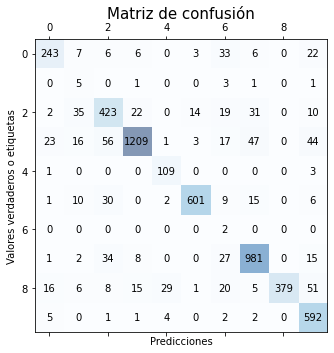

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(mcm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(mcm.shape[0]):
  for j in range(mcm.shape[1]):
      ax.text(x=j, y=i, s=mcm[i, j], va='center', ha='center')

plt.title("Matriz de confusión",fontsize=15)
#plt.title('f model: T= %d' % (t))
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos o etiquetas')

plt.tight_layout()
plt.show()

**Calculamos la métrica F1**

In [45]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.7f' % precision_score(y_true=labels, y_pred=predictions, average='macro'))
print('Recall: %.7f' % recall_score(y_true=labels, y_pred=predictions, average='macro'))
print('F1: %.7f' % f1_score(y_true=labels, y_pred=predictions, average='macro'))

Precision: 0.7040455
Recall: 0.8279764
F1: 0.6980012
